<a href="https://colab.research.google.com/github/PintoPaola/Inteligencia-Artificial/blob/main/parcial198.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
import pandas as pd

# Suponiendo que tienes acceso a la ubicación del archivo CSV
file_path = '/content/drive/MyDrive/IA/DATASET/SPP_train_5_folds (1).csv'

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path, delimiter=',')

# Convertir "Sí" a 1 y "No" a 0 en todo el DataFrame
#df.replace({'Yes': 1, 'No': 0}, inplace=True)
#df.replace({'Female': 1, 'Male': 0}, inplace=True)



# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, y_train = df.iloc[:16000, 1:14], df.iloc[:16000, 14]
X_test, y_test = df.iloc[16000:, 1:14], df.iloc[16000:, 14]
X = X_train
y = y_train

print(X)
print(y)




       song_duration_ms  acousticness  danceability    energy  \
0                160207      0.468952      0.558192  0.542314   
1                175575      0.562466      0.837785  0.684599   
2                 66156      1.025163      0.000000  0.000000   
3                194331      0.101652      0.000000  0.811663   
4                250925      0.676626      0.822191  0.413637   
...                 ...           ...           ...       ...   
15995            173846      0.549055      0.000000  0.781373   
15996                 0      0.128596      0.490813  0.000000   
15997            217682      0.000000      0.727543  0.932414   
15998            186527      0.183985      0.722794  1.002028   
15999            235673      0.047007      0.599089  0.650602   

       instrumentalness  key  liveness   loudness  audio_mode  speechiness  \
0              0.004122    1  0.000000   0.000000           1     0.048953   
1              0.001808    0  0.124795   0.000000           1  

Sigmoide
Sirve para mapear las entradas a probabilidades en el rango de 0 a 1

In [ ]:
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


Normaliza las características de entrada de una matriz

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X= np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
# Descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.51799656  0.00977255  0.00822476  0.01325624 -0.02876004 -0.05804522
  0.03737839  0.01906758 -0.04716408 -0.01742154  0.05936629 -0.02536936
 -0.01886469 -0.06525674]


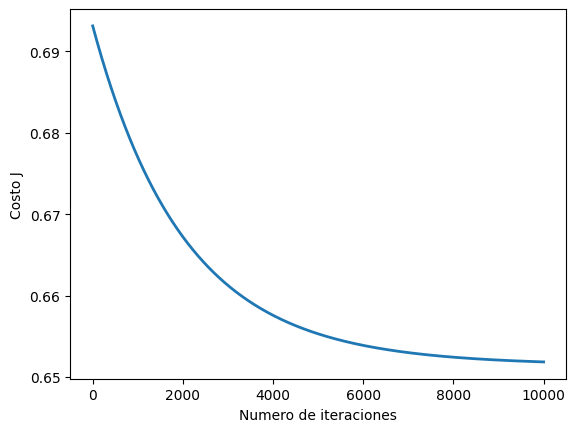

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
print(X_test)
print(theta)

       song_duration_ms  acousticness  danceability    energy  \
16000            177240      0.115801      0.703109  0.392876   
16001            253736      0.087003      0.641825  0.712615   
16002            256669      0.295037      0.548004  0.866272   
16003            240393      0.243936      0.687442  0.000000   
16004            263692      0.000000      0.537853  0.464865   
...                 ...           ...           ...       ...   
19995                 0      0.000000      0.652824  0.754717   
19996            224982      0.700969      0.451393  0.764497   
19997            235595      0.070360      0.720892  0.792667   
19998            183743      0.304418      0.000000  0.992989   
19999            248965      0.326164      0.568383  0.000000   

       instrumentalness  key  liveness   loudness  audio_mode  speechiness  \
16000          0.002278    0  0.169437 -10.760819           0     0.043423   
16001          0.001000    0  0.459868  -3.085447           1  

In [ ]:
X_test, y_test = df.iloc[16000:, 1:14], df.iloc[16000:, 14]
print(X_test)


       song_duration_ms  acousticness  danceability    energy  \
16000            177240      0.115801      0.703109  0.392876   
16001            253736      0.087003      0.641825  0.712615   
16002            256669      0.295037      0.548004  0.866272   
16003            240393      0.243936      0.687442  0.000000   
16004            263692      0.000000      0.537853  0.464865   
...                 ...           ...           ...       ...   
19995                 0      0.000000      0.652824  0.754717   
19996            224982      0.700969      0.451393  0.764497   
19997            235595      0.070360      0.720892  0.792667   
19998            183743      0.304418      0.000000  0.992989   
19999            248965      0.326164      0.568383  0.000000   

       instrumentalness  key  liveness   loudness  audio_mode  speechiness  \
16000          0.002278    0  0.169437 -10.760819           0     0.043423   
16001          0.001000    0  0.459868  -3.085447           1  

In [ ]:

# Normalizar los datos de prueba X_test
X_test_norm, mu, sigma = featureNormalize(X_test)

# Agregar una columna de unos correspondiente al término de intercepción
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

aprueba = sigmoid(X_test_norm.dot(theta))

# Imprimir la salida del modelo
print(aprueba)

[0.38639612 0.34204299 0.32686884 ... 0.38750433 0.33703975 0.36923801]


In [ ]:
print(X_test_norm)
print("THETAS")
print(theta)
print("PREDICt")
predict =sigmoid(X_test_norm.dot(theta))
print(predict)


[[ 1.          0.05180027 -0.46030703 ... -0.65159498 -0.73942379
  -0.18663335]
 [ 1.          1.0936969  -0.55686564 ...  0.30154519 -0.73942379
   0.88539684]
 [ 1.          1.13364517  0.14066016 ...  0.23835043  1.15168564
   1.25870326]
 ...
 [ 1.          0.84661148 -0.61266665 ...  0.31948307 -0.73942379
   0.83483074]
 [ 1.          0.14037292  0.17211517 ... -0.22205628 -0.73942379
   0.37697443]
 [ 1.          1.02871457  0.24502669 ...  1.62444019  1.15168564
   0.16036165]]
THETAS
[-0.51799656  0.00977255  0.00822476  0.01325624 -0.02876004 -0.05804522
  0.03737839  0.01906758 -0.04716408 -0.01742154  0.05936629 -0.02536936
 -0.01886469 -0.06525674]
PREDICt
[0.38639612 0.34204299 0.32686884 ... 0.38750433 0.33703975 0.36923801]
